# Applied Machine Learning: Credit Card Approval Prediction

*By Daniel Deutsch and José Lucas Barretto*

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Data Processing

At this staage the goal is to read both datasets and adapt its content for our classification models.

## Credit Records

The credit records dataset is ...

Here, we create a metric used to determine whether the client is good or bad.

In [3]:
# Reads the dataset
df_credit_record = pd.read_csv("./datasets/credit_record.csv")

# Renames columns
df_credit_record.rename(columns=str.lower, inplace=True)

# Numericalize status
df_credit_record.replace({'status': {'X': 0, 'C': 0, '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6}}, inplace=True)

# Calculates the metric
df_credit_record = df_credit_record.groupby('id')['status'].mean().reset_index()

# Sets the label
df_credit_record['is_good'] = 1*(df_credit_record['status'] <= 1)

# Application Records

In [4]:
# Reads the dataset
df_application_record = pd.read_csv("./datasets/application_record.csv")

# Renames columns
df_application_record.rename(columns=str.lower, inplace=True)

# Numericalize columns


df_application_record

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


# Merging data

In [5]:
df = pd.merge(df_credit_record, df_application_record, how='inner', on='id')

del df_credit_record, df_application_record

# Data Visualization

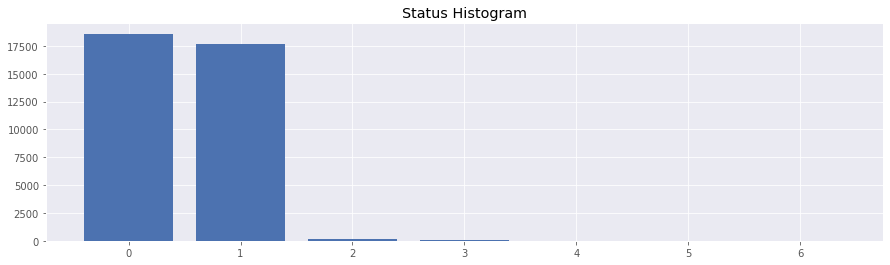

In [15]:
df['status'].hist(bins=np.arange(-0.5, 7), rwidth=0.8)
plt.title("Status Histogram")
plt.show()

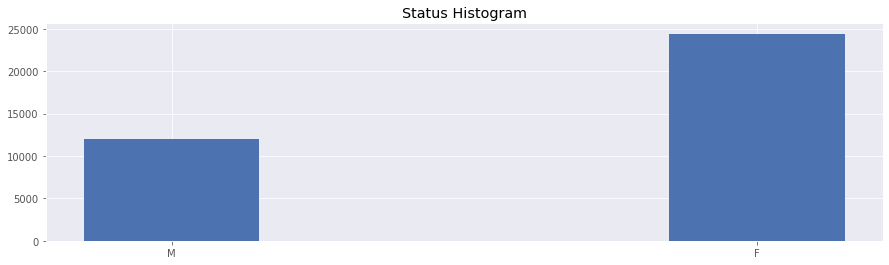

In [25]:
df['code_gender'].hist(bins=np.arange(-0.5, 2), rwidth=0.3)
plt.title("Status Histogram")
plt.show()

<AxesSubplot:>

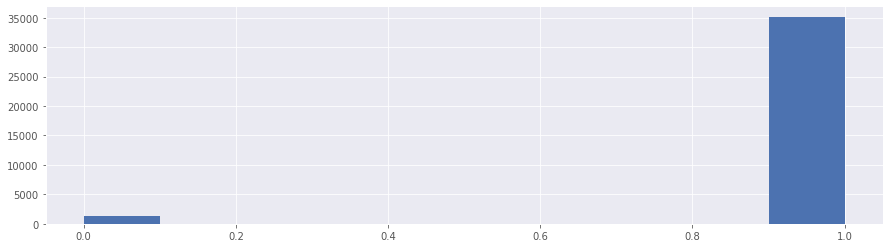

In [26]:
df['is_good'].hist()

# Prediction Analysis